In [1]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt
import community as community_louvain

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2013/Graph.json", 'rt') as gr:
    g = json.load(gr)

In [3]:
G = json_graph.node_link_graph(g)

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [5]:
# Print number of nodes and edges

In [6]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  1348
Number of Edges:  303579


In [7]:
#Degree calculation

In [8]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [9]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

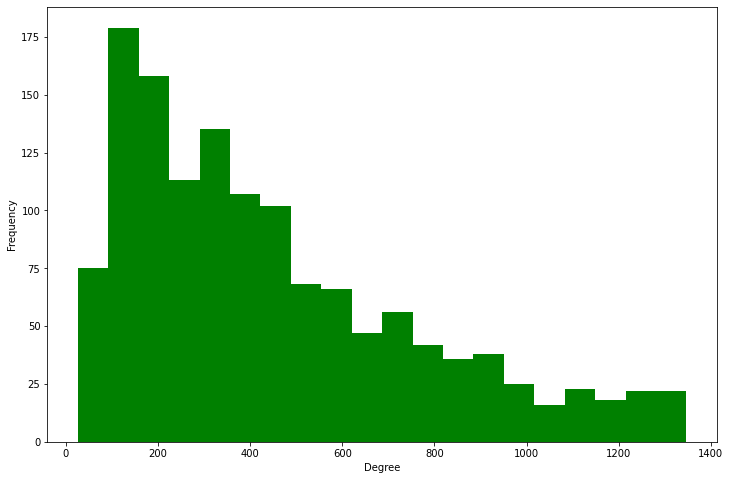

In [10]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.hist(degree_freq, color='green', bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [11]:
# Weight Distribution

Text(0, 0.5, 'Frequency')

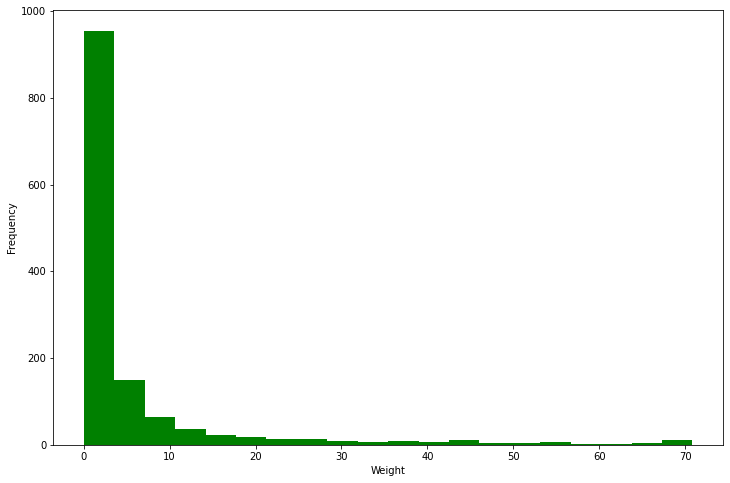

In [12]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

wt = range(len(weight_freq))
plt.figure(figsize=(12, 8))
plt.hist(weight_freq, color='green', bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [13]:
# Degree statistics

In [14]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

450.4139465875371
26
1347


In [15]:
# Weight Statistics
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

5.674037178828664
0.008094645080946455
70.86519302615264


In [16]:
# sort nodes based on degree

In [17]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'parent': 1347, 'location': 1347, 'self': 1347, 'opener': 1347, 'top': 1347, 'window': 1347, 'frames': 1347, 'document': 1347, 'var': 1347, 'name': 1347, 'length': 1345, 'init': 1334, 'null': 1330, 'createElement': 1320, 'src': 1314, 'push': 1311, 'type': 1304, 'getElementsByTagName': 1302, 'undefined': 1301, 'replace': 1296, 'true': 1284, 'Date': 1282, 'join': 1280, 'Math': 1276, 'setTimeout': 1276, 'parentNode': 1272, 'appendChild': 1269, 'navigator': 1268, 'href': 1247, 'object': 1245, 'prototype': 1244, 'id': 1243, 'body': 1239, 'height': 1230, 'string': 1230, 'getTime': 1228, 'width': 1227, 'arguments': 1224, 'toString': 1222, 'userAgent': 1221, 'style': 1221, 'false': 1219, 'match': 1217, 'function': 1215, 'addEventListener': 1214, 'call': 1213, 'documentElement': 1210, 'Array': 1210, 'readyState': 1206, 'onload': 1201, 'attachEvent': 1200, 'load': 1195, 'url': 1193, 'apply': 1186, 'getElementById': 1185, 'hasOwnProperty': 1176, 'slice': 1174, 'innerHTML': 1170, 'on': 1169, 'com

In [18]:
# sort nodes based on weight

In [19]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'document': 70.86519302615264, 'window': 70.85585305105924, 'var': 70.85585305105924, 'location': 70.83841843088486, 'name': 70.83156911581638, 'parent': 70.825031133251, 'self': 70.825031133251, 'opener': 70.825031133251, 'top': 70.825031133251, 'frames': 70.825031133251, 'length': 67.79296388543024, 'src': 66.84090909090948, 'null': 64.23972602739731, 'createElement': 63.953922789539384, 'init': 62.40161892901626, 'getElementsByTagName': 61.471980074719816, 'Date': 59.461394769614, 'type': 58.212017434620186, 'appendChild': 56.550435865504454, 'navigator': 55.80074719800744, 'href': 54.921544209215405, 'push': 54.722602739726064, 'undefined': 53.85678704856799, 'parentNode': 53.81351183063517, 'join': 52.686488169364836, 'height': 51.02366127023669, 'replace': 50.93742216687431, 'Math': 50.03300124533015, 'width': 49.95921544209221, 'true': 48.22229140722308, 'onload': 48.07378580323794, 'getTime': 46.68586550435866, 'body': 46.61394769613943, 'setTimeout': 45.88387297633882, 'addEv

In [20]:
# Check whether the graph is connected

In [21]:
nx.is_connected(G)

True

In [22]:
# Clustering Coefficient

In [23]:
nx.average_clustering(G)

0.8238456777878257

In [24]:
# average_shortest_path_length

In [25]:
nx.average_shortest_path_length(G)

1.6656169661562457

In [26]:
#Lovain methof

In [27]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [28]:
# number of partinions

In [29]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

8


In [30]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

141
71
95
25
107
254
433
222


In [31]:
with open("Lovain_clusters.json", 'w') as l:
    json.dump(louvain_clusters,l, indent=4)
